Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

# 0. Импорт и проверка данных

В целях сбора всех известных подключаемых библиотек и импорируемых модулей в одном месте, будем продолжать традицию подключать все что знаем.

In [28]:
# подгрузим pandas
import pandas as pd

# библиотеку для графиков
import matplotlib.pyplot as plt

# библиотека для работы с математикой
import numpy as np

# библиотека для работы со статистикой
from scipy import stats as st

# метод для разделения выборки на тренировочную и валидационную
from sklearn.model_selection import train_test_split

# метод для проведения кросс-валидации
from sklearn.model_selection import cross_val_score

# метод для создания собственных метрик и вызова их в качестве метрик sklearn
from sklearn.metrics import make_scorer


#________________________________Классификации____________________________

# модель классификации логистической регрессии
from sklearn.linear_model import LogisticRegression  

# # модель классификации дерева решений
# from sklearn.tree import DecisionTreeClassifier

# # модель классификации случайного леса
# from sklearn.ensemble import RandomForestClassifier

# метрики моделей классификации
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score


# #________________________________Регрессии________________________________

# # модель линейной регрессии
# from sklearn.linear_model import LinearRegression

# # модель регрессии дерева решений
# from sklearn.tree import DecisionTreeRegressor

# # модель регрессии случайного леса
# from sklearn.ensemble import RandomForestRegressor

# # метрики моделей регрессии
# from sklearn.metrics import mean_squared_error # mse
# from sklearn.metrics import mean_absolute_error # mae
# from sklearn.metrics import  r2_score #r^2


# #________________________________Перебор параметров модели__________________

# # для перебора параметров в моделях случайного леса
# from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import RandomizedSearchCV


#________________________________Градиентный бустинг_______________________

# градиентный бустинг с кросс-валидацией в библиотеке catboost
from catboost import CatBoostRegressor, CatBoostClassifier, Pool, cv

# градиентный бустинг в библиотеке LGBM
from lightgbm import LGBMRegressor

#________________________________Работа с текстом_________________________

# библиотека для лемматизации
from pymystem3 import Mystem 
# m = Mystem()  m.lemmatize(text)

# библиотека стимменга (для английских текстов)
from nltk.stem.snowball import EnglishStemmer
# stemmer = EnglishStemmer(ignore_stopwords=False)
# word_list = nltk.word_tokenize(text)
# stemmed_output = " ".join([stemmer.stem(w) for w in word_list])

# библиотека для регулярных выражений
import re  
# re.sub(шаблон, на что заменять, текст, в котором искать совпадения)

# библиотека для создания мешка слов
from sklearn.feature_extraction.text import CountVectorizer 
# count_vect = CountVectorizer()   
# bow = count_vect.fit_transform(corpus)

# библиотека для стоп-слов
import nltk
from nltk.corpus import stopwords  
# nltk.download('stopwords')
# stop_words = set(stopwords.words('russian')) 
# count_vect = CountVectorizer(stop_words=stop_words)

# TF-IDF для корпуса текста
from sklearn.feature_extraction.text import TfidfVectorizer 
# count_tf_idf = TfidfVectorizer(stop_words=stopwords) 
# tf_idf = count_tf_idf.fit_transform(corpus)

# для понижение размерности матрицы признаков
from sklearn.decomposition import TruncatedSVD
# инициализируем функцию, понижать будем до 100 признаков
# svd = TruncatedSVD(n_components=100)
# svd.fit(features_train)

# для модели BERT
import torch
import transformers 
from tqdm import notebook 

# # код
# # токинизируем текст
# tokenizer = transformers.BertTokenizer(
#     vocab_file='/datasets/ds_bert/vocab.txt')

# tokenized = df_tweets['text'].apply(
#     lambda x: tokenizer.encode(x, add_special_tokens=True))

# max_len = 0
# for i in tokenized.values:
#     if len(i) > max_len:
#         max_len = len(i)

# padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

# attention_mask = np.where(padded != 0, 1, 0)

# config = transformers.BertConfig.from_json_file('/datasets/ds_bert/bert_config.json')
# model = transformers.BertModel.from_pretrained('/datasets/ds_bert/rubert_model.bin', config=config)

# # будем разбивать на 100 бэтчей для скорости обучения
# batch_size = 100
# # разобъем на эмбэдинги
# embeddings = []
# for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
#         batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
#         attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

       
#         with torch.no_grad():
#             batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
#         embeddings.append(batch_embeddings[0][:,0,:].numpy())
# # обучим модель логистической регрессии
# features = np.concatenate(embeddings)


# # обучите и протестируйте модель
# train, test = train_test_split(features, test_size=0.5, random_state=12345)
# features_train, features_test, target_train, target_test = train_test_split(features, df_tweets['positive'], test_size=0.5)
# model = LogisticRegression()
# model.fit(features_train,target_train)
# predicted = model.predict(features_train)


# #________________________________________________________________________

# # стандартизация независимых переменных
# from sklearn.preprocessing import StandardScaler

# # кодирование категориальных признаков
# from sklearn.preprocessing import OrdinalEncoder

# # для перемешивания при up/down-сэмплинге
# from sklearn.utils import shuffle

# # для более удобного вывода датафреймов, вместо print()
# from IPython.display import display

# # для разбиения временных рядов на сезонную, трендовую и шумовую состовляющие
# from statsmodels.tsa.seasonal import seasonal_decompose

# #_________________RDD SQL_______________________________________________
#from pyspark.sql import SparkSession

#APP_NAME = "DataFrames"
#SPARK_URL = "local[*]"
#spark = SparkSession.builder.appName(APP_NAME) \
#        .config('spark.ui.showConsoleProgress', 'false') \
#        .getOrCreate()
#taxi = spark.read.load('/datasets/pickups_terminal_5.csv', 
#                       format='csv', header='true', inferSchema='true')
#taxi=taxi.fillna(0)
#print(taxi[['date','hour','minute']].show(5))
#taxi.registerTempTable("taxi")
#print(spark.sql("SELECT count(distinct date) FROM taxi WHERE pickups>200").show())
#print(taxi.groupBy("date").mean().select("date", "avg(pickups)").show()) 

Аналитика первым этапом - это конечно замечательно, но только если нулевым этапом идет проверка и подготовка данных. Займемся этим и импортируем данные

In [29]:
# Количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года
query_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')

# Среднее количество прибывающих рейсов в день для каждого города за август 2018 года
query_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

# Количество билетов, купленных на рейсы в Москву для каждой недели с 23 июля по 30 сентября 2018 года. 
# В таблице есть информация о количестве купленных за неделю билетов; 
# отметка, проходил ли в эту неделю фестиваль; название фестиваля и номер недели
query_5 = pd.read_csv('https://code.s3.yandex.net/datasets/query_last.csv')

Проверим данные на корректность и если надо изменим типы.

In [30]:
display(query_1.info())
display(query_3.info())
display(query_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


None

С типам все хорошо, проверим на пропущенные значения

In [31]:
display(query_1.isna().sum())
display(query_3.isna().sum())
display(query_5.isna().sum())

model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

week_number      0
ticket_amount    0
festival_week    7
festival_name    7
dtype: int64

Отлично. В результатах 5 запроса есть 7 строк, в которых не указаны фестивали и недели на которых они проходили. Это впринципе логично: нет фестиваля - нет данных, но оставлять прпуски не комильфо, поэтому заменим пропущенные значения на "no festival" для названия и на "-1" для недели. Нам же проще будет фильтровать потом.

In [32]:
query_5['festival_name'] = query_5['festival_name'].fillna('no festival')
query_5['festival_week'] = query_5['festival_week'].fillna(-1)
display(query_5.isna().sum())
display(query_5['festival_week'].unique())
display(query_5['festival_name'].unique())

week_number      0
ticket_amount    0
festival_week    0
festival_name    0
dtype: int64

array([30., 31., -1., 36.])

array(['Park Live', 'Пикник Афиши', 'no festival', 'Видфест'],
      dtype=object)

Данные подготовили, можно анализировать.

# 1. Аналитика

Выберем топ-10 городов по количеству рейсов

In [33]:
top_10_cities = query_3.sort_values(by='average_flights',ascending=0).head(10)
display(top_10_cities)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим графики: модели самолётов и количество рейсов, топ-10 городов и количество рейсов.

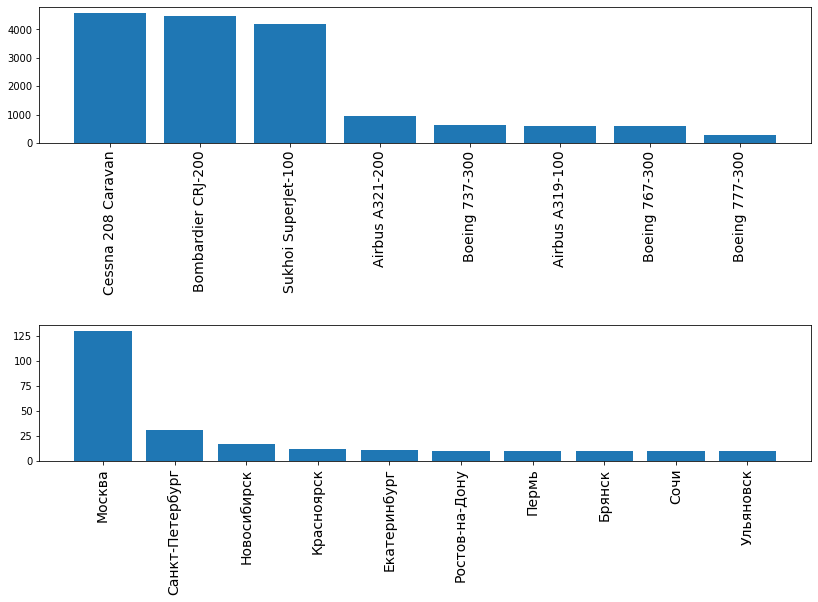

In [34]:
x1 = query_1.sort_values(by='flights_amount', ascending=0)['model']
y1 = query_1.sort_values(by='flights_amount', ascending=0)['flights_amount']

x2 = top_10_cities['city']
y2 = top_10_cities['average_flights']


fig, axes = plt.subplots(2, 1)

axes[0].bar(x1, y1)
axes[1].bar(x2, y2)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(9)    #  высота Figure
axes[0].tick_params(axis='x', labelrotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
fig.tight_layout(pad=3.0)
plt.show()


In [35]:
display(query_1.sort_values(by='flights_amount', ascending=0).head(3)['flights_amount'].sum())
display(query_1.sort_values(by='flights_amount', ascending=0).tail(5)['flights_amount'].sum())
display(query_1.sort_values(by='flights_amount', ascending=0)['model'].values)

13188

3097

array(['Cessna 208 Caravan', 'Bombardier CRJ-200', 'Sukhoi SuperJet-100',
       'Airbus A321-200', 'Boeing 737-300', 'Airbus A319-100',
       'Boeing 767-300', 'Boeing 777-300'], dtype=object)

Наибольшее количество рейсов было выполнено на трех моделях самолетов: Cessna 208 caravan,  Bombardier CRJ-200 и Sukhoi SuperJet-100. Всего на эти три модели приходится 13 188 рейсов, в то время, как на остальные 5 моделей - 3097. 

Легким гуглением узнаем, что вместимость по моделям составляет:
- Cessna 208 Caravan - 14 человек;
- Bombardier CRJ-200 - от 40 до 50 человек;
- Sukhoi SuperJet-100 - 103 человека;
- Airbus A321-200 - 220 человек;
- Boeing 737-300 - 149 человек;
- Airbus A319-100 - от 124 до 156 человек;
- Boeing 767-300 - 375 человек;
- Boeing 777-300 - 550 человек.

Таким образом видно, что с увеличением количества людей, которое может перевезти самолет - снижается количество рейсов. Может все-таки большие самолеты более популярны у людей? Ну и сразу посмотрим, может люди чаще летают на длинные расстояния? Погуглим максимальную дальность полетов: 

- Cessna 208 Caravan - от 1 785 до 1 982 км;
- Bombardier CRJ-200 - от 3 045 до 3715 км;
- Sukhoi SuperJet-100 - от 3 048 до 4 578 км;
- Airbus A321-200 - 5 950 человек;
- Boeing 737-300 - 4 204 км;
- Airbus A319-100 - 6 700 км;
- Boeing 767-300 - 7 890 км;
- Boeing 777-300 - 11 029 км.

Предположим, что все модели максимальной вместительности и максимальной дальности полета. Тогда посчитаем, какое максимальное количество людей и на какое максимальное расстояние перевезли самолеты из группы топ-3 и остальные:

In [36]:
top_3_people = 14+50+103
top_3_distance = 1982+3715+4578

other_people = 220+149+156+375+550
other_distance = 5950+4204+6700+7890+11029

top_3_people_total = top_3_people*query_1.sort_values(by='flights_amount', ascending=0).head(3)['flights_amount'].sum()
top_3_distance_total = top_3_distance*query_1.sort_values(by='flights_amount', ascending=0).head(3)['flights_amount'].sum()

other_people_total = top_3_people*query_1.sort_values(by='flights_amount', ascending=0).tail(5)['flights_amount'].sum()
other_distance_total = top_3_distance*query_1.sort_values(by='flights_amount', ascending=0).tail(5)['flights_amount'].sum()

display(top_3_people_total, top_3_distance_total,other_people_total, other_distance_total)
display(top_3_distance_total/top_3_people_total, other_distance_total/other_people_total)

2202396

135506700

517199

31821675

61.52694610778443

61.52694610778443

Получается, что не только по количество рейсов, но и по максимально возможному количеству перевезенных людей и по максимально возможному "налету" три самые популярные самолета - самые популярные. Даже не смотря на то, что они не дальномагистральные и далеко не вместительные. 

Другими словами - авиа-пассажиры, в большей своей массе, летают небольшими самолетами на относительно небольшие расстояния, таких пассажиров много, поэтому рейсы у них частые, но, видимо, запускать большой самолет на эти же направления экономически не целесообразно. 

При этом, коэффициенты перевозки "максимальная дальность полета на 1 пассажира" у топ-3 самолетов по количеству рейсов и у остальны - одинаковы. Это может свидетельствовать о примерно равных маржинальностях полета, что косвенно подтверждает гипотезу о экономической не целесообразности полетов на малые дистанции на больших самолетах.

Касательно популярности городов прибытия - все логично. Первые 6 мест занимают крупные авиа-хабы страны. Следом за ними, по всей видимости, идут аэропорты, которые являются крупными региональными авиахабами.

Построим график города и количество рейсов.

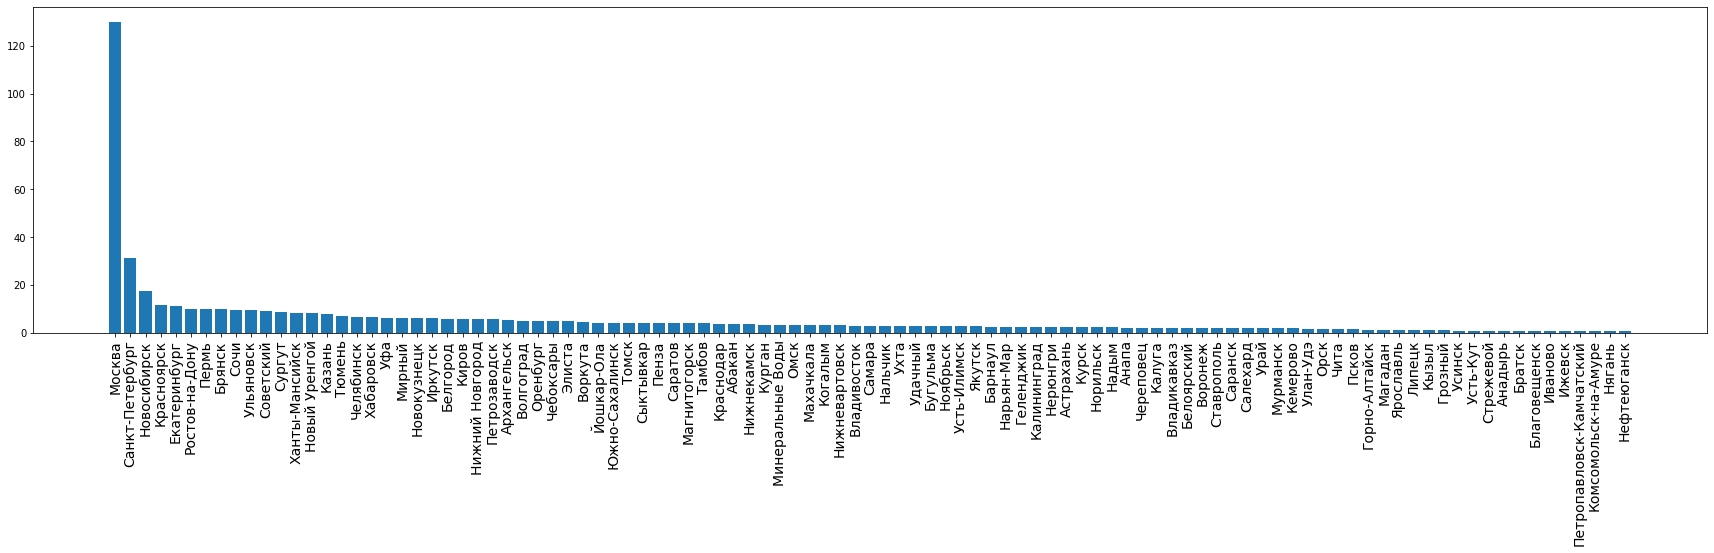

In [37]:
x = query_3.sort_values(by='average_flights',ascending=0)['city']
y = query_3.sort_values(by='average_flights',ascending=0)['average_flights']

fig, axes = plt.subplots(1, 1)

axes.bar(x, y)

fig.set_figwidth(30)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
axes.tick_params(axis='x', labelrotation=90)
plt.rc('xtick', labelsize=14)
plt.show()

Не очень информативно. Объеденим города с 5 и менее рейсами в группу "Прочие" и построим график снова

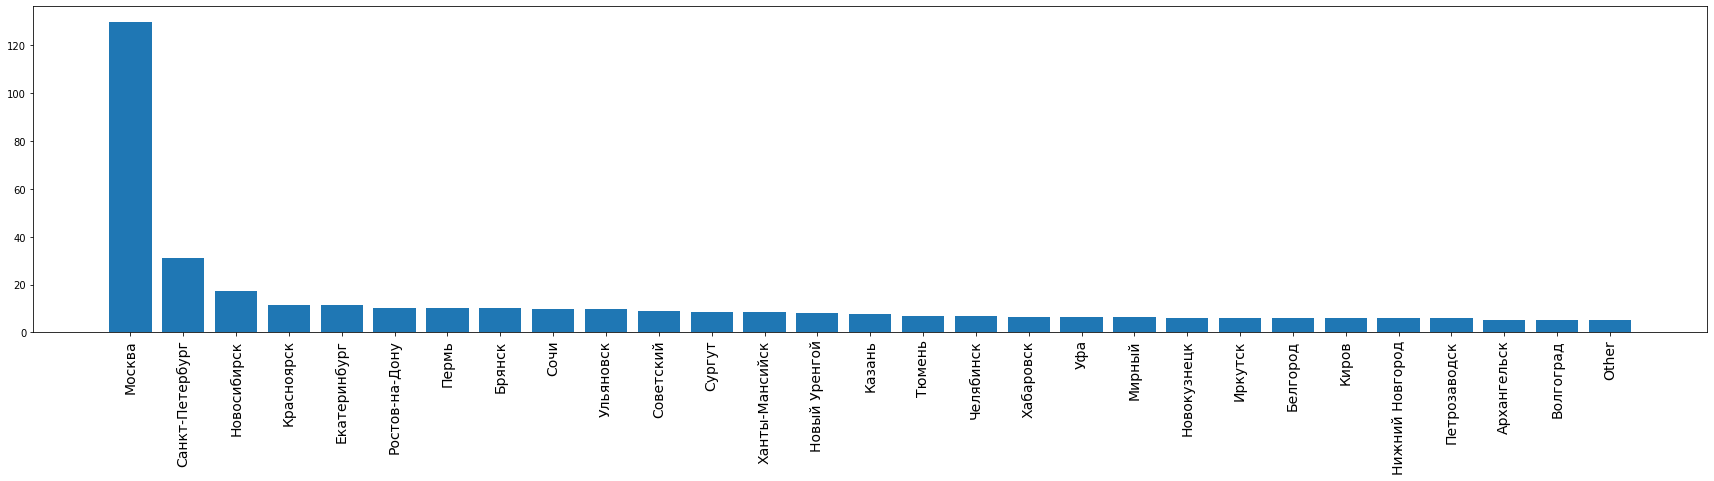

In [38]:
query_3['Group']=query_3[query_3['average_flights']>5]['city']
query_3['Group']=query_3['Group'].fillna('Other')

x = query_3.sort_values(by='average_flights',ascending=0)['Group']
y = query_3.sort_values(by='average_flights',ascending=0)['average_flights']

fig, axes = plt.subplots(1, 1)

axes.bar(x, y)

fig.set_figwidth(30)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
axes.tick_params(axis='x', labelrotation=90)
plt.rc('xtick', labelsize=14)
plt.show()



Всего получилось 28 городов, против 101 без группировки. Все это достаточно популярные транспортные хабы. Да, Ханты-Мансийск или Хабаровск сложно назвать перевалочными пунктами для туристов, но Ханты-Мансийск популярный перевалочный пунк у вахтовиков, а Хабаровск - популярный региональный транспортный узел дальнего востока страны.

Посмотрим, что творится в среднем по стране. Очистим нашу выборку от выбросов и построим график.

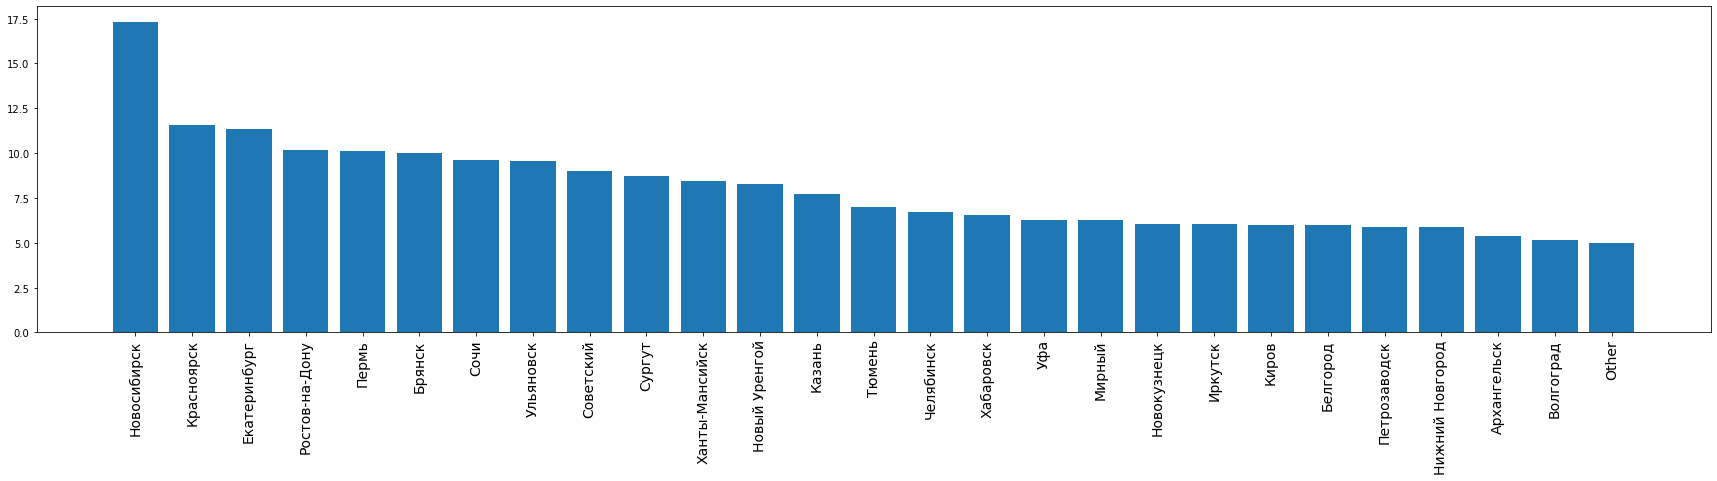

In [53]:
# Расчитаем интервал графиков от Q1-3*IQR до Q3+3*IQR
def plotting_intervals(data,column):
    
    first_quantile = data[column].quantile(0.25)
    third_quantile = data[column].quantile(0.75)
    iqr = third_quantile - first_quantile
    
    interval_low = first_quantile - 3 * iqr
    interval_high = third_quantile + 3 * iqr
    
    if interval_low < 0:
        interval_low = 0
        
    if interval_high>max(data[column]):
        interval_high = max(data[column])
    
    return(interval_low, interval_high)

low_bound, high_bound = plotting_intervals(query_3, 'average_flights')

x = query_3.query('average_flights <= @high_bound & average_flights > @low_bound').sort_values(by='average_flights',ascending=0)['Group']
y = query_3.query('average_flights <= @high_bound & average_flights > @low_bound').sort_values(by='average_flights',ascending=0)['average_flights']

fig, axes = plt.subplots(1, 1)

axes.bar(x, y)

fig.set_figwidth(30)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
axes.tick_params(axis='x', labelrotation=90)
plt.rc('xtick', labelsize=14)
plt.show()

Не особо что-то поменялось. Зато точно можем сказать, что среднее количество прибывающих за день рейсов в Москву или Питер - это статистический выброс, если мы говорим про "среднее количество прибывающих за день рейсов в аэропорты страны"

# 2. Проверка гипотезы

Проверим гипотезу, что средний спрос на билеты во время фестиваля не отличается от среднего спроса на билеты в обычное время. Для этого используем данные полученные из выгрузки, которые представляют из себя данные о количестве билетов, купленных на рейсы в Москву для каждой недели с 23 июля по 30 сентября 2018 года, с отметкой, проходил ли в эту неделю фестиваль и если проходил, то как назывался.

За нулевую гипотезу определим гипотезу о равенстве двух средних. Другими словами - что среднее количество билетов не изменяется в зависимости от того проходит фестиваль или нет. За альтернативную гипотезу примем гипотезу о том, что в недели прохождения фестиваля количество проданных билетов изменяется.


In [56]:
display(query_5)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,-1.0,no festival
3,33,51378,-1.0,no festival
4,34,51492,-1.0,no festival
5,35,51360,-1.0,no festival
6,36,51386,36.0,Видфест
7,37,51670,-1.0,no festival
8,38,51518,-1.0,no festival
9,39,51623,-1.0,no festival


In [50]:
sample_1 = query_5[~(query_5['festival_name']=='no festival')]['ticket_amount']

sample_2 = query_5[query_5['festival_name']=='no festival']['ticket_amount']

display(sample_1.mean()-sample_2.mean())

#display(sample_1,sample_2)

alpha = .05 # критический уровень статистической значимости
             # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
     sample_1, 
     sample_2,
     equal_var = True)  # дисперсию будем оценивать по дисперсию каждой выборки по объединенному датасету выборок
                        # потому что есть все основания пологать, что данные взяты из схожих по параметрам совокупностей

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

-2868.1904761904807

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


То есть несмотря на то, что разница в среднем количестве проданных билетов в недели фестивалей и в остальное время составляет 2868 билетов - с вероятностью 9.6% такое различие можно получить случайно.... По крайней мере при оценке по критерию Стьюдента.

Критерий Стьюдента плохо работает на малых выборках, когда плохо известно распределение и дисперсия. В таких случаях используют непараметрические критерии. Например, в нашем случае, когда выборки независимы и одинаково распределены - можно попробовать использовать критерий Манна-Уитни. Именно это мы и сделаем.

In [58]:

results = st.mannwhitneyu(
     sample_1, 
     sample_2)  

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


А вот это уже интереснее. Получается, что мы не отвергаем гипотезу о том, что в недели прохождения фестиваля количество проданных билетов изменяется. Вероятность, что мы случайно получили различие - всего 3%.

# Общий вывод

1) Проявляя смекалку, гугл и здоровую логику - даже бедные данные можно обоготить дополнительной информацией и сделать интересные выводы

2) На одинаково распределенных независимых выборках малых объемов, парраметрические критерии, такиен как Стъюдента, работают не очень хорошо и нужно смотреть в сторону U-теста Манна-Уитнии.